<div class="alert alert-info">
Привет, Илья! Меня зовут Светлана и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Нужно добавить описательную часть, в нее нужно добавить название проекта, цели и задачи проекта, как будет определено, что цели достигнуты? Это важная часть проекта и такой навык обязательно пригодится тебе в будущем</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> добавил описание, цель и задачу.</div>

## Проект телекоммуникации.
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Цель проекта:
Научится прогнозировать отток клиентов.

Задача проекта:
1) Подготовить данные.
2) Провести исследовательский анализ данных.
3) Построить и обучить модель для прогнозирования оттока клиентов.
4) Добится минимального порога: AUC-ROC = 0.85

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.pipeline import make_pipeline, Pipeline 
import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool , cv
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
# Доимпортировали

In [3]:
contract = pd.read_csv(r'/datasets/contract_new.csv')
personal = pd.read_csv(r'/datasets/personal_new.csv')
internet = pd.read_csv(r'/datasets/internet_new.csv')
phone = pd.read_csv(r'/datasets/phone_new.csv')

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Text(0.5, 1.0, 'Пол клиента')

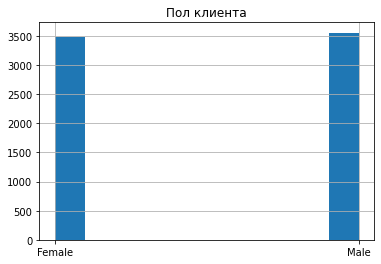

In [7]:
personal['gender'].hist()
plt.title('Пол клиента')

Пользователей женщин и мужчин примерно равное количество

Text(0.5, 1.0, 'Пенсионера')

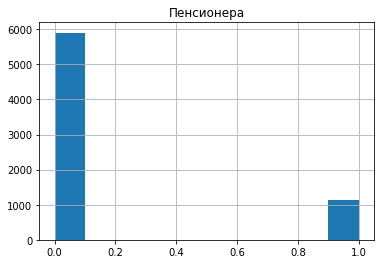

In [8]:
personal['SeniorCitizen'].hist()
plt.title('Пенсионера')

Пользователей имеющих статус пенсионеров подавляющее меньшенство

Text(0.5, 1.0, 'Наличие партнера')

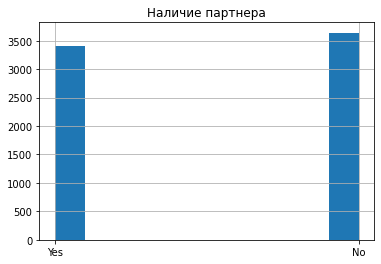

In [9]:
personal['Partner'].hist()
plt.title('Наличие партнера')

Клиентов с партёром и без практически одинаковое количество

Text(0.5, 1.0, 'Наличие иждевенца')

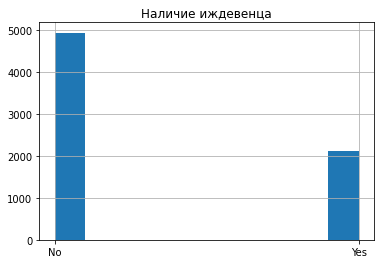

In [10]:
personal['Dependents'].hist()
plt.title('Наличие иждевенца')

Клиентов с детьми почти треть от общего количества

<div class="alert alert-success">
<b>👍 Успех:</b> Датасет исследован, визуализировано распределение данных
</div>

In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


OnlineSecurity 
 No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64


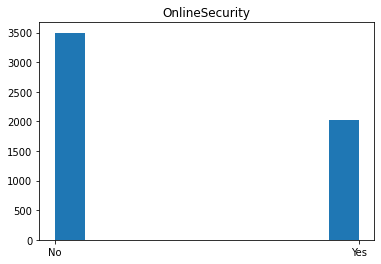

OnlineBackup 
 No     3088
Yes    2429
Name: OnlineBackup, dtype: int64


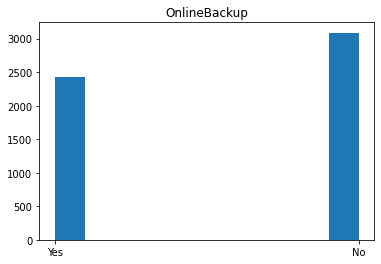

DeviceProtection 
 No     3095
Yes    2422
Name: DeviceProtection, dtype: int64


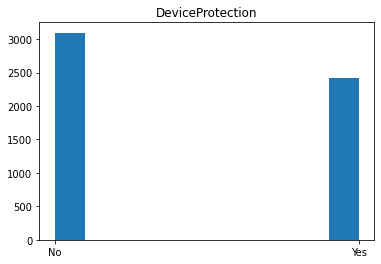

TechSupport 
 No     3473
Yes    2044
Name: TechSupport, dtype: int64


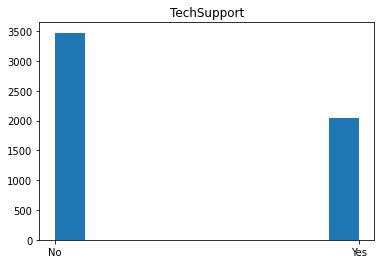

StreamingTV 
 No     2810
Yes    2707
Name: StreamingTV, dtype: int64


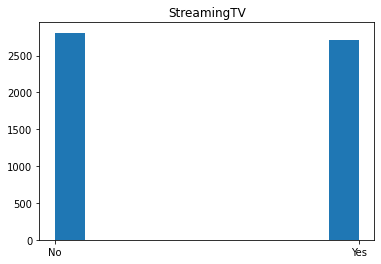

StreamingMovies 
 No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


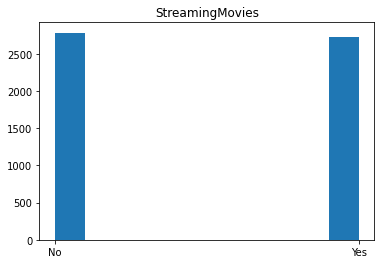

In [14]:
binary = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in binary:
    print(i,'\n',internet[i].value_counts())
    plt.hist(internet[i])
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'Тип подключения')

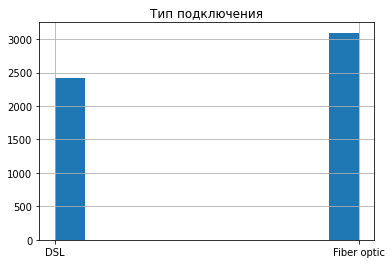

In [15]:
internet['InternetService'].hist()
plt.title('Тип подключения')

Тут для построения графиков применил цикл: 
1 - пользователей онлайн блокировкой сайтов на треть меньше
2 - Пользователей хранилищем почти поровну (удивительно)
3 - Пользователей антивирусом на 500 человек меньше
4 - выделеной техподдержкой пользуются 2000 тысячи человек
5 - пользователей стриминго ТВ поровну от всех клиентов
6 - Подключений по DSL немногим меньше чем по оптоволокну

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [16]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [17]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Text(0.5, 1.0, 'Многоканальный телефон')

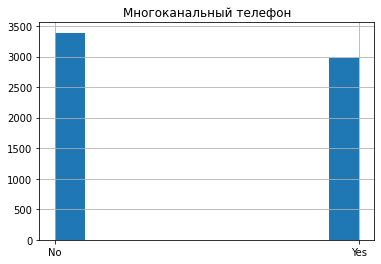

In [18]:
phone['MultipleLines'].hist()
plt.title('Многоканальный телефон')

Многоканальным телефоном пользуется чуть меньше людей чем обычным

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


Text(0.5, 1.0, 'Оплата услуг')

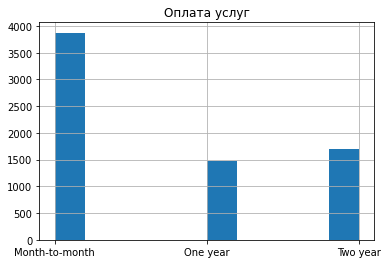

In [19]:
print(contract['Type'].value_counts())
contract['Type'].hist()
plt.title('Оплата услуг') # посмотрим на какие сроки клиенты оплачивают услуги

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


Text(0.5, 1.0, 'Способ оплаты')

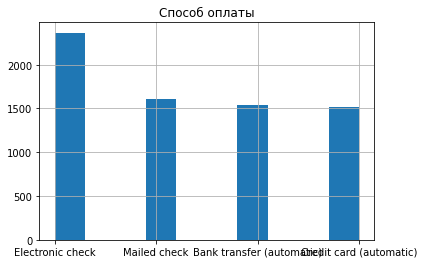

In [20]:
print(contract['PaymentMethod'].value_counts())
contract['PaymentMethod'].hist()
plt.title('Способ оплаты')# посмотрим какими способами клиенты производят оплату

In [21]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate']) # преобразуем даты

In [22]:
contract['NotClient'] = (contract['EndDate'] != 'No').astype(int) # добавим столбец с целевым признаком 

In [23]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NotClient
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


In [24]:
contract['NotClient'].value_counts()

0    5942
1    1101
Name: NotClient, dtype: int64

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Целевой признак добавлен
</div>

In [25]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'].replace(['No'], ['2020-02-01']))

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Почему заменяешь данные на такую дату? </s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Изначально поставил текущую дату, исправил на 2020-02-01 как указано в описании данных.</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [26]:
contract['Days'] = (contract['EndDate'] - contract['BeginDate']).dt.days #

In [27]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NotClient,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,0,153


<AxesSubplot:>

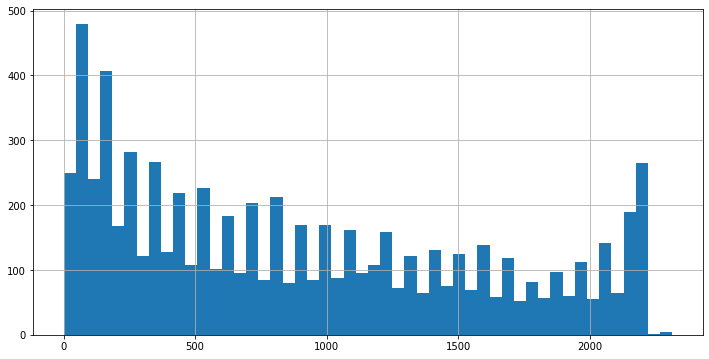

In [28]:
contract['Days'].hist(bins=50, figsize=(12,6))

<AxesSubplot:>

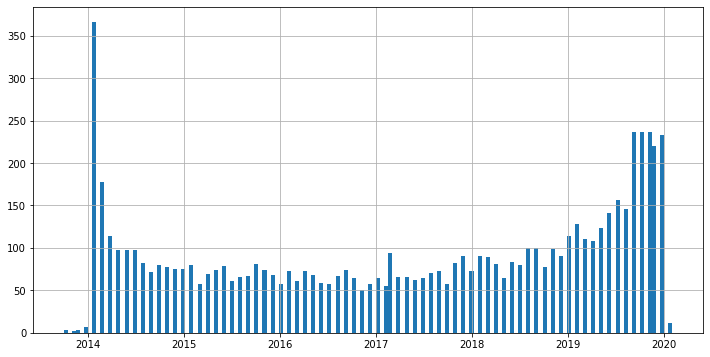

In [29]:
contract['BeginDate'].hist(bins=150, figsize=(12,6))

In [30]:
contract.isnull().sum() # Смотрим пропуски

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
NotClient           0
Days                0
dtype: int64

In [31]:
contract = contract.drop(['BeginDate','EndDate'], axis=1) # удалим столбцы с датами чтобы избежать утечку

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Эти данные нам больше не нужны
</div>

Вывод:
1 contract - Пропусков в данных нет, из последнего графика распределения по количеству дней подключения пользователей мы видим большие пики в районе 1500 и 3500 дней! Видимо были большие рекламные компании и много людей подключилось к Компании.
Построив график по датам подключения увидим пики появившихся новых пользователей в 2014 и 2020 г.
2 personal - тут стоит отметить что пенсионеров много меньше от общего количества, что закономерно. Наличие иждевенца - пользователей с детьми почти треть от общего количества. 
3 internet - пользователей онлайн блокировкой сайтов и антивирусом на треть меньше, пользователей хранилищем почти поровну (удивительно).
4 phone - пользователей многоканальным телефоном равное количиство

Список уточняющих вопросов - ВОПРОСОВ НЕ ИМЕЮ

Примерный план решения задачи:

1 - предобработка данных и исследовательский анализ.
2 - создание дополнительного признака.
3 - сбор данных в одну таблицу, создание выборок.
4 - применение моделей обучения CatBoost, LightGBM, LogisticRegression.
5 - определить лучшую модель подбирая гиперпараметры и метрику AUC-ROC
6 - тестирование лучшей модели, написание итогового вывода.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> План должен быть более подробным </s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> добавил пункт 5, 4-ый расписал подробнее.</div>

Цель: Построить модель для прогнозирования оттока клиентов.

<div class="alert alert-success">
<b>👍 Успех:</b> План принят!
</div>

Собераем финальный дата сет, на котором будем обучать наши модели!

In [32]:
data = contract.merge(personal, 
                      how = 'left', on = 'customerID').merge(internet, 
                      how = 'left', on = 'customerID').merge(phone, how = 'left', on = 'customerID')
# обьединим все наши данные в одну таблицу

In [33]:
data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NotClient,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.5,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Датасеты объединены, все данные на месте
</div>

In [35]:
data.duplicated().sum() #проверим на наличие дубликатов

0

In [36]:
data = data.fillna('No') # убераем пропуски в столбцах

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Сколько у нас пропусков, откуда они появились и почему принято решение о такой замене?
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Пропуски появились после обьединения данных, в столбцах InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines. Появились потому что люди не пользуются этими услугами, поэтому и заменил на значение "NO".</div> 

In [38]:
data.isna().mean()

customerID          0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
NotClient           0.0
Days                0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
MultipleLines       0.0
dtype: float64

In [39]:
data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NotClient,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.6,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.5,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [40]:
numeric = ['MonthlyCharges', 'TotalCharges', 'Days']

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [42]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Что получилось в результате такой замены?
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Использовал метод to_numeric() с параметром errors='coerce', для преобразованият значений типа object в float64.</div> 

In [44]:
data[numeric].corr()

,MonthlyCharges,TotalCharges,Days
MonthlyCharges,1.000000,0.630297,0.220054
TotalCharges,0.630297,1.000000,0.821442
Days,0.220054,0.821442,1.000000


In [45]:
def coding_for_binary_features(data, binary):
    data[binary].fillna(0, inplace = True) # пропуск соответствует значению "No"
    data[binary] = data[binary].replace(['No'], 0)
    data[binary] = data[binary].replace(['Yes'], 1)
    return data[binary]

In [46]:
data['MultipleLines'] = coding_for_binary_features(data, 'MultipleLines')
data['InternetService'] = coding_for_binary_features(data, 'InternetService')
data['OnlineSecurity'] = coding_for_binary_features(data, 'OnlineSecurity')
data['OnlineBackup'] = coding_for_binary_features(data, 'OnlineBackup')
data['DeviceProtection'] = coding_for_binary_features(data, 'DeviceProtection')
data['TechSupport'] = coding_for_binary_features(data, 'TechSupport')
data['StreamingTV'] = coding_for_binary_features(data, 'StreamingTV')
data['StreamingMovies'] = coding_for_binary_features(data, 'StreamingMovies')

In [47]:
data['Partner'] = coding_for_binary_features(data, 'Partner')
data['Dependents'] = coding_for_binary_features(data, 'Dependents')

In [48]:
data['gender'] = data['gender'].replace(['Male'], 1).replace(['Female'], 0)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(['Yes'], 1).replace(['No'], 0)
data['InternetService'] = data['InternetService'].replace(['DSL'], 1).replace(['Fiber optic'], 0)

In [49]:
data.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,NotClient,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,31.04,0,31,0,0,1,0,1,0,1,0,0,0,0,0
1,5575-GNVDE,One year,0,Mailed check,56.95,2071.84,0,1036,1,0,0,0,1,1,0,1,0,0,0,0
2,3668-QPYBK,Month-to-month,1,Mailed check,53.85,226.17,0,123,1,0,0,0,1,1,1,0,0,0,0,0
3,7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1960.60,0,1371,1,0,0,0,1,1,0,1,1,0,0,0
4,9237-HQITU,Month-to-month,1,Electronic check,70.70,353.50,0,153,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   int64  
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   int64  
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int64  
 11  Dependents        7043 non-null   int64  
 12  InternetService   7043 non-null   int64  
 13  OnlineSecurity    7043 non-null   int64  
 14  OnlineBackup      7043 non-null   int64  
 15  DeviceProtection  7043 non-null   int64  
 16  TechSupport       7043 non-null   int64  


In [51]:
corr = data.corr()
corr

,PaperlessBilling,MonthlyCharges,TotalCharges,NotClient,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
PaperlessBilling,1.000000,0.352150,0.152820,0.054869,-0.001569,-0.011754,0.156530,-0.014877,-0.111377,-0.063121,-0.003636,0.126735,0.103797,0.037880,0.223841,0.211716,0.163530
MonthlyCharges,0.352150,1.000000,0.630297,0.154286,0.220054,-0.014569,0.220173,0.096848,-0.113890,-0.160189,0.296594,0.441780,0.482692,0.338304,0.629603,0.627429,0.490434
TotalCharges,0.152820,0.630297,1.000000,0.051548,0.821442,-0.010354,0.093383,0.290269,0.056297,-0.048627,0.393724,0.479512,0.495828,0.421172,0.498387,0.494521,0.438909
NotClient,0.054869,0.154286,0.051548,1.000000,0.016578,0.013499,0.056724,0.146447,0.032564,-0.026723,0.085921,0.148288,0.141059,0.067596,0.129261,0.143557,0.169066
Days,-0.001569,0.220054,0.821442,0.016578,1.000000,-0.003825,0.005283,0.339945,0.148731,0.015373,0.301884,0.318038,0.326907,0.306542,0.256113,0.254143,0.293424
gender,-0.011754,-0.014569,-0.010354,0.013499,-0.003825,1.000000,-0.001874,-0.001808,0.010517,0.006568,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.008414
SeniorCitizen,0.156530,0.220173,0.093383,0.056724,0.005283,-0.001874,1.000000,0.016479,-0.211185,-0.108322,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.142948
Partner,-0.014877,0.096848,0.290269,0.146447,0.339945,-0.001808,0.016479,1.000000,0.452676,-0.000851,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.142057
Dependents,-0.111377,-0.113890,0.056297,0.032564,0.148731,0.010517,-0.211185,0.452676,1.000000,0.052010,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.024526
InternetService,-0.063121,-0.160189,-0.048627,-0.026723,0.015373,0.006568,-0.108322,-0.000851,0.052010,1.000000,0.321269,0.157884,0.146291,0.313118,0.016274,0.025698,-0.199920


Между признаками TotalCharges и Days сильная корреляция, 0.82, присутствует проблему мультиколлинеарности. Это объясняется тем, что чем дольше клиент пользуется услугами, тем больше составляют его общие расходы.

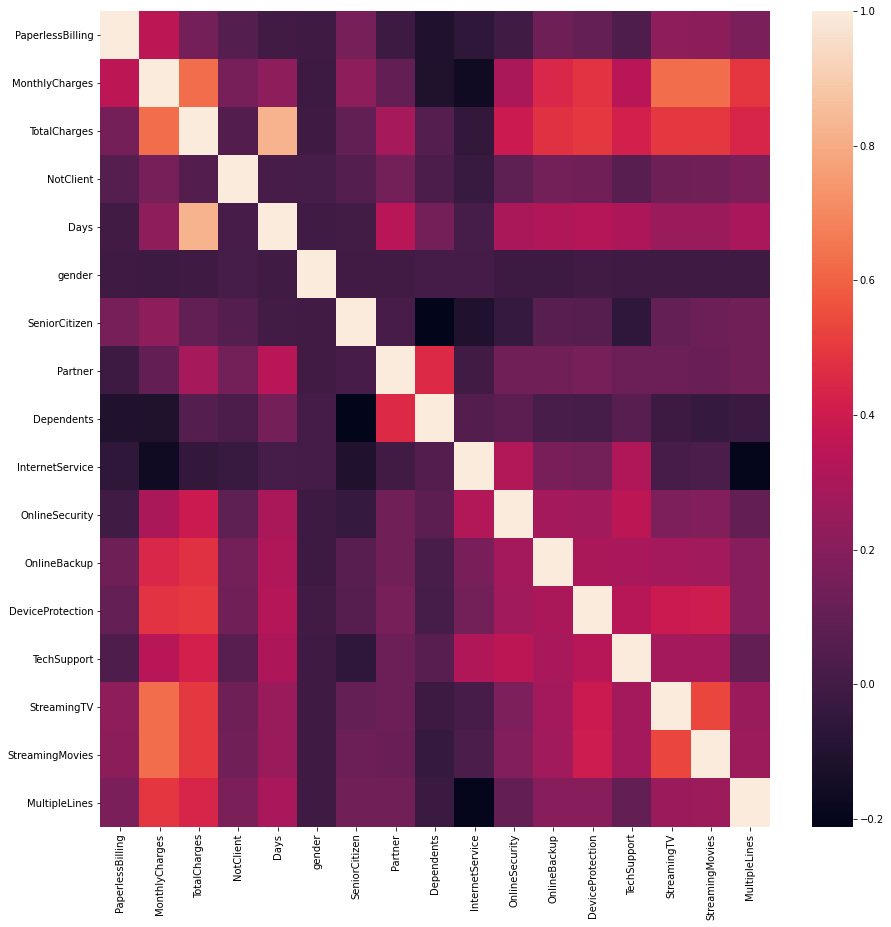

In [52]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot=False);

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Все данные нужно исследовать в разрезе ушел/остался, корреляцию нужно посмотреть по всем признакам
</div>

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   int64  
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   NotClient         7043 non-null   int64  
 7   Days              7043 non-null   int64  
 8   gender            7043 non-null   int64  
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int64  
 11  Dependents        7043 non-null   int64  
 12  InternetService   7043 non-null   int64  
 13  OnlineSecurity    7043 non-null   int64  
 14  OnlineBackup      7043 non-null   int64  
 15  DeviceProtection  7043 non-null   int64  
 16  TechSupport       7043 non-null   int64  


## Подготовка данных

Создадим переменные с признаками

In [54]:
#data = data.drop('TotalCharges', axis = 1)

In [55]:
data = data.drop(['customerID'], axis=1)

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Почему принято решение об удалении этих признаков?
</div>

In [56]:
features = data.drop(['NotClient'], axis=1)
target = data['NotClient']

Создадим тренироваочный и тестовые датасеты

In [57]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=250923, stratify = target)

In [58]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((5282, 18), (5282,), (1761, 18), (1761,))

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Нужно проверить, что данные корректно разделились на выборки
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Данные азделились корректно.</div> 

Кодируем и стандартизируем признаки для логистической регрессии и случайного леса.

In [59]:
cat_cols = ['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
num_cols = ['MonthlyCharges', 'Days']

In [60]:
transformer_log = make_column_transformer((OneHotEncoder(drop='first', handle_unknown='error'), cat_cols),
    (StandardScaler(), num_cols))

## Логистическая регрессия

In [61]:
model_lr = LogisticRegression(class_weight = 'balanced', random_state = 250923)

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Проверь еще раз работу моделей, какие предупреждения и ошибки появляются при их работе, какое значение метрики, нет ли утечки. Во всех моделях лучше использовать GridSearchCV.
</div>

In [62]:
pipline_lr = make_pipeline(transformer_log, model_lr)
parametrs_lr = { 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__max_iter': range (6,15,2),
              }
lr = GridSearchCV(pipline_lr, param_grid=parametrs_lr, cv=3, scoring='roc_auc')
lr.fit(features_train, target_train)
auc_roc_lr = lr.best_score_
auc_roc_lr_params=lr.best_params_
# лучшее значение auc_roc на кросс-валидации
print(f'best_score: {auc_roc_lr}')
# лучшие гиперпараметры
print(f'best_params: {auc_roc_lr_params}')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

best_score: 0.7509621186741479
best_params: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 12}


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_score: 0.7521481401436562
best_params: {'logisticregression__C': 100, 'logisticregression__max_iter': 14}

### Случайный лес

In [63]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state = 250923)
pipline_rf =  make_pipeline(transformer_log, model_rf)
grid = {'randomforestclassifier__n_estimators':[10,20,30,40,50,60,70,80,90,100],
        'randomforestclassifier__max_depth': [5,6,7,8,9]}
rf = lr = GridSearchCV(pipline_rf, param_grid=grid, cv=3, scoring='roc_auc')
rf.fit(features_train, target_train)
auc_roc_rf = rf.best_score_
auc_roc_rf_params=rf.best_params_
# лучшее значение auc_roc на кросс-валидации
print(f'best_score: {auc_roc_rf}')
# лучшие гиперпараметры
print(f'best_params: {auc_roc_rf_params}')

best_score: 0.820545713632669
best_params: {'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 100}


### Градиентный бустинг CatBoost

In [64]:
train_dataset = Pool(features_train, target_train, cat_features=cat_cols) 
test_dataset = Pool(features_test, target_test, cat_features=cat_cols)
model_cat = CatBoostClassifier(random_state=250923, verbose=200, 
                               eval_metric='AUC:hints=skip_train~false', auto_class_weights = 'Balanced')
grid_cat = {'iterations': [100, 150, 200, 300],
        'learning_rate': [0.2, 0.3, 0.4, 0.5],
        'depth': [2, 4, 6, 8],
         'l2_leaf_reg': [3,5,7,9] }
model_cat.grid_search(grid_cat, train_dataset, cv=5)

model_cat_auc = model_cat.get_best_score()
print(model_cat_auc)


0:	learn: 0.6999855	test: 0.6821765	best: 0.6821765 (0)	total: 49.3ms	remaining: 4.88s
99:	learn: 0.8775972	test: 0.8261832	best: 0.8261832 (99)	total: 292ms	remaining: 0us

bestTest = 0.8261831583
bestIteration = 99

0:	loss: 0.8261832	best: 0.8261832 (0)	total: 1.13s	remaining: 4m 46s
0:	learn: 0.6999855	test: 0.6821765	best: 0.6821765 (0)	total: 2.68ms	remaining: 265ms
99:	learn: 0.9017638	test: 0.8377800	best: 0.8377800 (99)	total: 253ms	remaining: 0us

bestTest = 0.8377799596
bestIteration = 99

1:	loss: 0.8377800	best: 0.8377800 (1)	total: 1.38s	remaining: 2m 55s
0:	learn: 0.6999855	test: 0.6821765	best: 0.6821765 (0)	total: 2.29ms	remaining: 227ms
99:	learn: 0.9164481	test: 0.8537700	best: 0.8538269 (98)	total: 255ms	remaining: 0us

bestTest = 0.8538269444
bestIteration = 98

2:	loss: 0.8538269	best: 0.8538269 (2)	total: 1.64s	remaining: 2m 18s
0:	learn: 0.6999855	test: 0.6821765	best: 0.6821765 (0)	total: 2.33ms	remaining: 231ms
99:	learn: 0.9278897	test: 0.8580423	best: 0.8583

In [65]:
model_cat_auc = model_cat.get_best_score()
model_cat_best = model_cat.get_params()
print(model_cat_auc)
print(model_cat_best)

{'learn': {'Logloss': 0.2410728591103628, 'AUC': 0.9750912609056647}}
{'verbose': 200, 'auto_class_weights': 'Balanced', 'eval_metric': 'AUC:hints=skip_train~false', 'random_state': 250923, 'depth': 2, 'l2_leaf_reg': 7, 'iterations': 300, 'learning_rate': 0.5}


In [66]:
model_cat_auc = model_cat_auc['learn']['AUC']
print(model_cat_auc)

0.9750912609056647


### LightGBM

In [67]:
for i in cat_cols:
    features_train[i] = features_train[i].astype('category')
model_lgbm = lgb.LGBMClassifier(n_estimators=1000, class_weight='balanced', random_state=250923) 
grid_lgbm = {'num_leaves':[11, 50],
        'learning_rate': [0.3, 0.4]}
model_lgbm = GridSearchCV(model_lgbm, grid_lgbm, scoring='roc_auc', verbose=10, cv=3)
model_lgbm.fit(features_train, target_train, categorical_feature=cat_cols)
auc_roc_lgbm = model_lgbm.best_score_
auc_roc_lgbm_params=model_lgbm.best_params_
# лучшее значение auc_roc на кросс-валидации
print(f'best_score: {auc_roc_lgbm}')
# лучшие гиперпараметры
print(f'best_params: {auc_roc_lgbm_params}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START learning_rate=0.3, num_leaves=11............................


/tmp/ipykernel_78/2054220640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[i] = features_train[i].astype('category')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 1/3; 1/4] END ..........learning_rate=0.3, num_leaves=11; total time=  17.2s
[CV 2/3; 1/4] START learning_rate=0.3, num_leaves=11............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 2/3; 1/4] END ..........learning_rate=0.3, num_leaves=11; total time=   5.7s
[CV 3/3; 1/4] START learning_rate=0.3, num_leaves=11............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 3/3; 1/4] END ..........learning_rate=0.3, num_leaves=11; total time=   4.6s
[CV 1/3; 2/4] START learning_rate=0.3, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 1/3; 2/4] END ..........learning_rate=0.3, num_leaves=50; total time=  10.8s
[CV 2/3; 2/4] START learning_rate=0.3, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 2/3; 2/4] END ..........learning_rate=0.3, num_leaves=50; total time=  14.2s
[CV 3/3; 2/4] START learning_rate=0.3, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 3/3; 2/4] END ..........learning_rate=0.3, num_leaves=50; total time=  10.4s
[CV 1/3; 3/4] START learning_rate=0.4, num_leaves=11............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 1/3; 3/4] END ..........learning_rate=0.4, num_leaves=11; total time=   5.9s
[CV 2/3; 3/4] START learning_rate=0.4, num_leaves=11............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 2/3; 3/4] END ..........learning_rate=0.4, num_leaves=11; total time=   5.5s
[CV 3/3; 3/4] START learning_rate=0.4, num_leaves=11............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 3/3; 3/4] END ..........learning_rate=0.4, num_leaves=11; total time=   4.4s
[CV 1/3; 4/4] START learning_rate=0.4, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 1/3; 4/4] END ..........learning_rate=0.4, num_leaves=50; total time=   9.2s
[CV 2/3; 4/4] START learning_rate=0.4, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 2/3; 4/4] END ..........learning_rate=0.4, num_leaves=50; total time=   9.3s
[CV 3/3; 4/4] START learning_rate=0.4, num_leaves=50............................


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV 3/3; 4/4] END ..........learning_rate=0.4, num_leaves=50; total time=  10.5s


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


best_score: 0.8778245613505072
best_params: {'learning_rate': 0.3, 'num_leaves': 11}


### Итоговая таблица 

In [68]:
columns=['roc_auc модели', 'парамтеры лучшей модели']
index = ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor', 'LightGBM']
data = [[auc_roc_lr, auc_roc_lr_params], [auc_roc_rf, auc_roc_rf_params], 
        [model_cat_auc, model_cat_best], [auc_roc_lgbm, auc_roc_lgbm_params]]

final_tabl = pd.DataFrame(data = data, columns = columns, index=index)

In [69]:
final_tabl

,roc_auc модели,парамтеры лучшей модели
LinearRegression,0.750962,"{'logisticregression__C': 0.1, 'logisticregres..."
RandomForestRegressor,0.820546,"{'randomforestclassifier__max_depth': 8, 'rand..."
CatBoostRegressor,0.975091,"{'verbose': 200, 'auto_class_weights': 'Balanc..."
LightGBM,0.877825,"{'learning_rate': 0.3, 'num_leaves': 11}"


## Тестируем лучшую модель CatBoostRegressor	

In [70]:
model_cat_best=CatBoostClassifier(random_state=250923, verbose=200, eval_metric='AUC:hints=skip_train~false', 
                                  depth=2, iterations=200, learning_rate=0.4, l2_leaf_reg=3)
model_cat_best.fit(features_train,target_train, cat_features=cat_cols)
predict=model_cat_best.predict(features_test)
probabilities_valid = model_cat_best.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_test, probabilities_one_valid)

0:	learn: 0.6390335	total: 3.42ms	remaining: 680ms
199:	learn: 0.9521684	total: 626ms	remaining: 0us


In [71]:
print(roc_auc)

0.9118047228679799


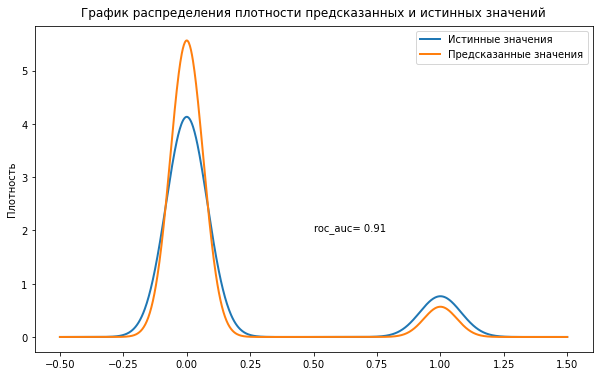

In [72]:
plt.figure(figsize=(10,6))
target_test.plot(kind='kde', linewidth=2)
pd.Series(predict).plot(kind='kde',linewidth=2)
plt.title('График распределения плотности предсказанных и истинных значений', y=1.01)
plt.legend(['Истинные значения','Предсказанные значения'])
plt.text(0.5,2,'roc_auc= {:.2f}'.format(roc_auc))
plt.xlabel('')
plt.ylabel('Плотность')
plt.show()

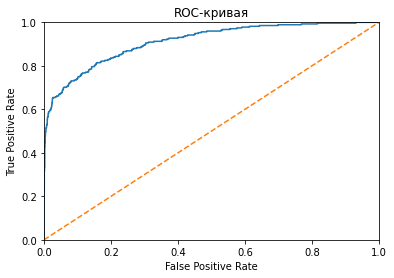

In [73]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_valid[:, 1])
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC-кривая")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

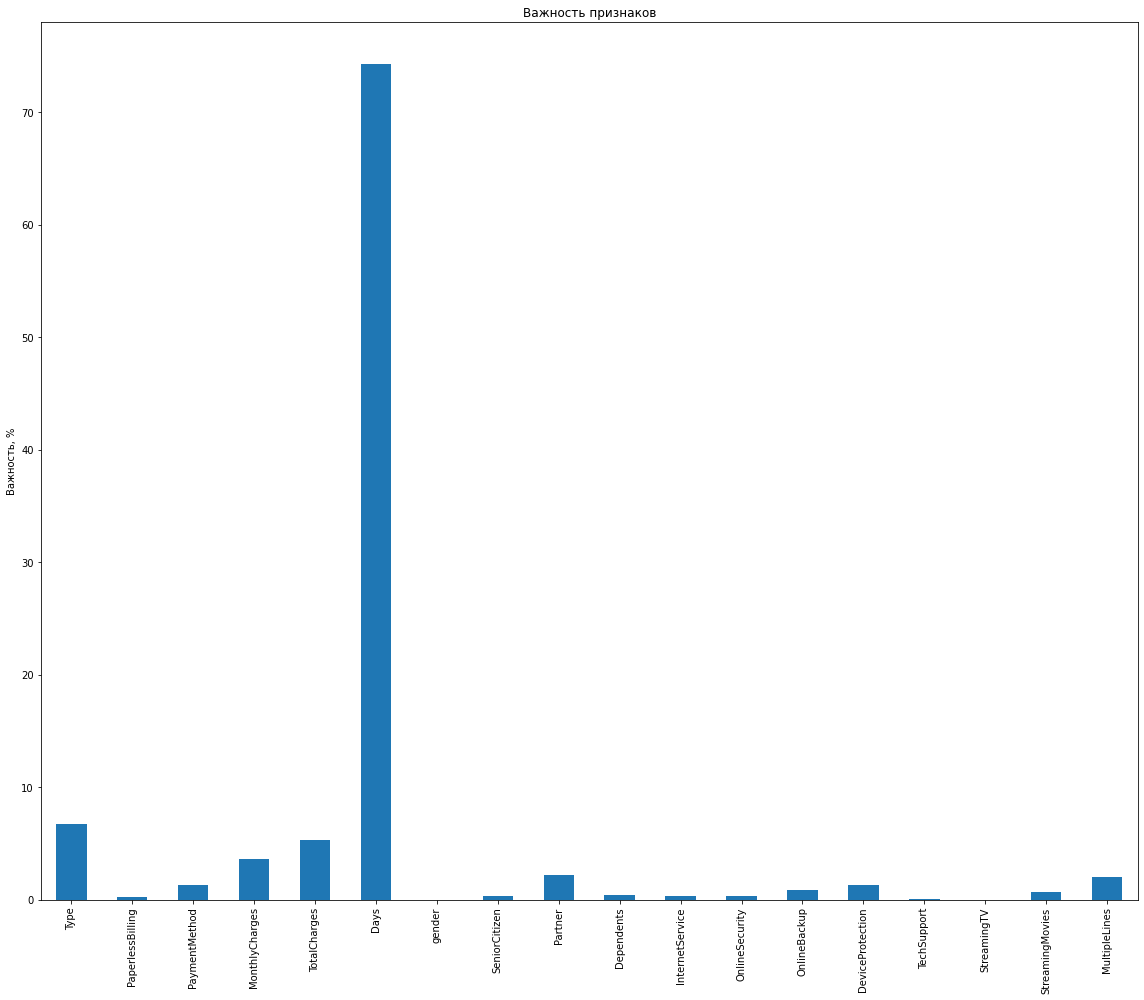

In [74]:
cat_important = pd.Series(model_cat_best.get_feature_importance(),
                        features_test.columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_important.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

Самым важным признаком является количество дней!

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Нужно добавить матрицу ошибок и итоговый вывод, отчет будет в следующей части
</div>

In [75]:
cmatrix = confusion_matrix(target_test, predictions_test)
plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True, cmap='Blues', 
            fmt='d').set(title='Матрица ошибок', xlabel='Предсказания', ylabel='Правильные ответы')
plt.show();

NameError: name 'predictions_test' is not defined

Насколько понимаю отчёт и комментарии нужно в третей часте!